In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

%load_ext autoreload
%autoreload 2
import emulator

### Build emulators

In [71]:
statistic = 'upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
testmean = True

tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag

res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)

emu_upf = emulator.Emulator(statistic, training_dir=training_dir, testing_dir=testing_dir, 
                        gperr=gperr, testmean=testmean, hyperparams=hyperparams)

Loading training data
Nparams: 18
Loading testing data
Nparams: 18


In [72]:
emu_upf.build()

Rebuilding emulators
Computed GP 0
Computed GP 1
Computed GP 2
Computed GP 3
Computed GP 4
Computed GP 5
Computed GP 6
Computed GP 7
Computed GP 8


In [73]:
statistic = 'wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
testmean = True

tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag

res_dir = '../../clust/results_{}/'.format(statistic)
gperr = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

training_dir = '{}training_{}{}/'.format(res_dir, statistic, traintag)
hyperparams = "../training_results/{}_training_results{}.dat".format(statistic, gptag)

testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)

emu_wp = emulator.Emulator(statistic, training_dir=training_dir, testing_dir=testing_dir, 
                        gperr=gperr, testmean=testmean, hyperparams=hyperparams)

Loading training data
Nparams: 18
Loading testing data
Nparams: 18


In [74]:
emu_wp.build()

Rebuilding emulators
Computed GP 0
Computed GP 1
Computed GP 2
Computed GP 3
Computed GP 4
Computed GP 5
Computed GP 6
Computed GP 7
Computed GP 8


In [17]:
rmin = 0.1
rmax = 50
nbins = 9
rbins = np.logspace(np.log10(rmin), np.log10(rmax), nbins + 1) # Note the + 1 to nbins
r_logavg = 10 ** (0.5 * (np.log10(rbins)[1:] + np.log10(rbins)[:-1]))

In [5]:
hods_test = np.loadtxt("/mount/sirocco2/zz681/emulator/CMASSLOWZ/test_galaxy_mocks_wp_RSD/test_galaxy_mocks_new_f_env/HOD_test_np11_n1000_new_f_env.dat")
nhodparams_test = hods_test.shape[1]
hods_test[:,0] = np.log10(hods_test[:,0])
hods_test[:,2] = np.log10(hods_test[:,2])
cosmos_test = np.loadtxt("../CMASS/Gaussian_Process/hod_file/cosmology_camb_test_box_full.dat")
ncosmoparams_test = cosmos_test.shape[1]
self.nparams_test = nhodparams_test + ncosmoparams_test
print(f"Nparams: {self.nparams_test}")

In [6]:
print(hods_test.shape)
print(cosmos_test.shape)

(1000, 11)
(7, 7)


In [9]:
hod_mean = np.mean(hods_test, axis=0)
print(hod_mean.shape)
cosmo_mean = np.mean(cosmos_test, axis=0)
print(cosmo_mean.shape)
params_mean = np.concatenate((cosmo_mean, hod_mean))
print(params_mean.shape)

(11,)
(7,)
(18,)


In [61]:
pdict_mean = {}
param_names_ordered = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w',
                        'M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f',
                        'f_env', 'delta_env', 'sigma_env']
for i in range(len(param_names_ordered)):
    print("{}: {:.3f}".format(param_names_ordered[i], params_mean[i]))
    pdict_mean[param_names_ordered[i]] = params_mean[i]

Omega_m: 0.302
Omega_b: 0.048
sigma_8: 0.806
h: 0.682
n_s: 0.963
N_eff: 3.450
w: -0.997
M_sat: 14.154
alpha: 1.012
M_cut: 11.849
sigma_logM: 0.323
v_bc: 0.352
v_bs: 1.085
c_vir: 1.100
f: 1.004
f_env: 0.004
delta_env: 1.251
sigma_env: 0.546


In [21]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [57]:
pdict_mean

{'Omega_m': 0.3018442857142857,
 'Omega_b': 0.04824398571428572,
 'sigma_8': 0.8058088571428572,
 'h': 0.682317,
 'n_s': 0.9625150000000001,
 'N_eff': 3.4499999999999997,
 'w': -0.9965127142857143,
 'M_sat': 14.15351517106943,
 'alpha': 1.0121550539,
 'M_cut': 11.84886983807495,
 'sigma_logM': 0.32304270724000034,
 'v_bc': 0.35214283716430034,
 'v_bs': 1.0850441469000012,
 'c_vir': 1.0995841902000008,
 'f': 1.0038609099999987,
 'f_env': 0.003558546714400002,
 'delta_env': 1.2506969546,
 'sigma_env': 0.5459776326000003}

[<emulator.Emulator object at 0x7f73e0863cf8>, <emulator.Emulator object at 0x7f73e268dc18>]


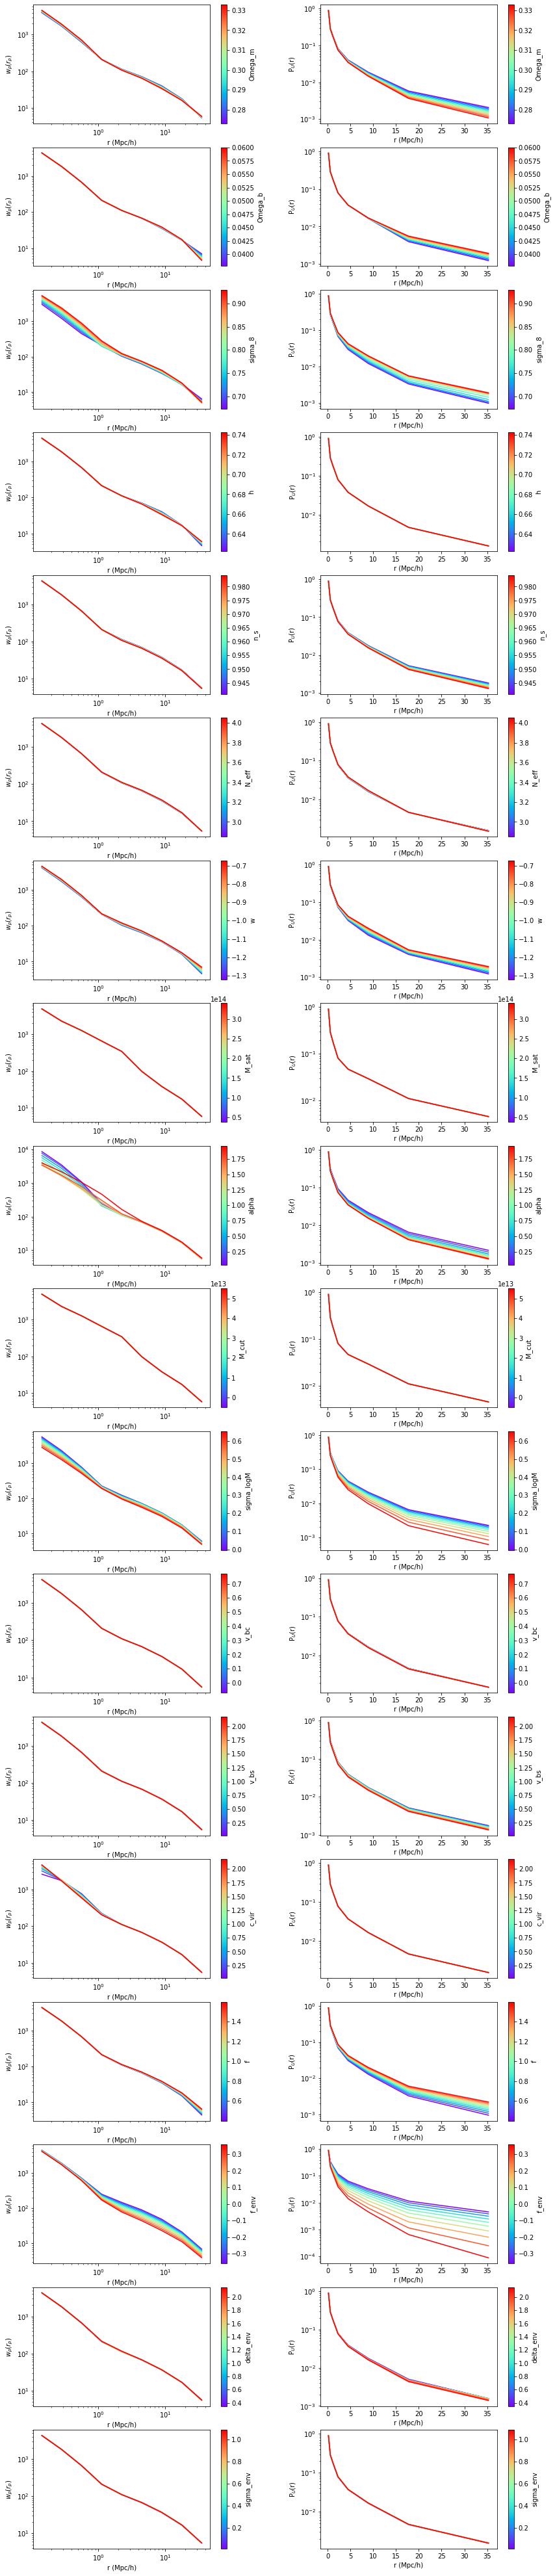

In [82]:
statistics = ['wp', 'upf']
emus = [emu_wp, emu_upf]
print(emus)
nrows = len(pdict_mean.keys())
#nrows = 2
ncols = len(emus)

panel_size = (4,7)
figsize = (panel_size[1]*ncols, panel_size[0]*nrows)
fig, axarr = plt.subplots(nrows, ncols, figsize=figsize)
plt.subplots_adjust(wspace=0.3)
for i in range(nrows):
    
    
    pn = param_names_ordered[i]
    #vals = np.linspace(0.2, 0.4, 2)
    val_mean = pdict_mean[pn]

    
    for j in range(ncols):
        emu = emus[j]
        statistic = statistics[j]
        ax = axarr[i][j]

        preds = []
        rs = []

        #vals = np.linspace(0.7*val_mean, 1.3*val_mean, 10)
        pmin, pmax = emu.get_param_bounds(pn)
        vals = np.linspace(pmin, pmax, 10)
        pdict = pdict_mean.copy()
        
        for val in vals:
            pdict[pn] = val
            pred = emu.predict(pdict)
            rs.append(r_logavg)
            preds.append(pred)

        lc = multiline(rs, preds, vals, cmap='rainbow', ax=ax)

        #if j==ncols-1:
        axcb = fig.colorbar(lc, ax=ax)
        axcb.set_label(pn)

        ax.set_yscale("log")        
        ax.set_xlabel("r (Mpc/h)")
    
        if statistic == 'upf':
            ax.set_ylabel(r"P$_U$(r)")

        elif statistic == 'wp':
            ax.set_ylabel(r'$w_p$($r_p$)')
            ax.set_xscale('log')